In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('winequality-red.csv')

In [4]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


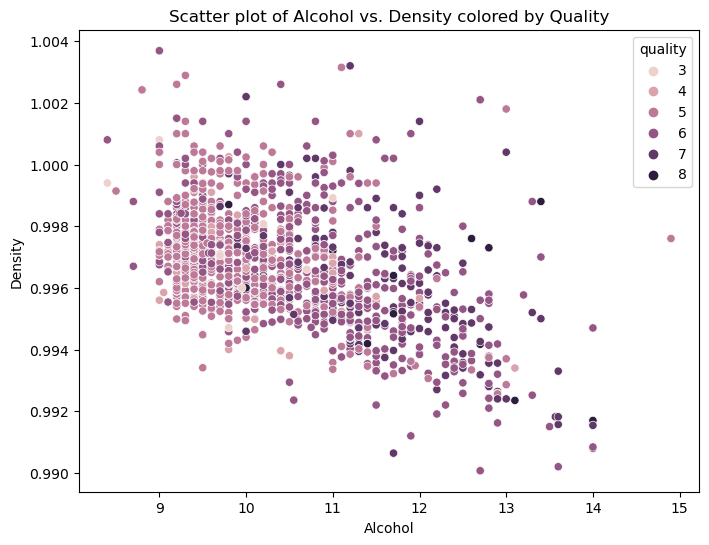

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality')
plt.title('Scatter plot of Alcohol vs. Density colored by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

In [11]:
X = df[['alcohol', 'density']]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
dtree = DecisionTreeClassifier()  # Puedes configurar los hiperparámetros aquí
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22        10
           5       0.62      0.72      0.67       130
           6       0.57      0.50      0.53       132
           7       0.59      0.55      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.57      0.58      0.57       320

[[ 0  0  0  1  0  0]
 [ 0  2  4  4  0  0]
 [ 2  2 94 29  3  0]
 [ 2  4 47 66 11  2]
 [ 0  0  5 14 23  0]
 [ 0  0  1  2  2  0]]
